# Problem Statement

The goal of this data science project is to analyze a comprehensive dataset of airline information to derive meaningful insights related to flight schedules, pricing, and airline preferences. The project will involve thorough data cleaning, preparation, and exploratory data analysis to answer key questions regarding the timing of flights, the impact of duration on ticket prices, the preferred routes for Jet Airways, and a broader analysis of the relationship between different airlines and their corresponding ticket prices.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
train_data = pd.read_excel("Data_Train.xlsx")

In [27]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#
#
## Data Cleaning

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Checking for null values

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
train_data[train_data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Removing Null Values:

In [15]:
train_data.dropna(inplace=True)

Checking all null values have been removed

In [16]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [17]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### Making a copy of the dataset

In [32]:
data=train_data.copy()

In [33]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [34]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


#
#

## Data Preparation

In [35]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [36]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [39]:
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:change_into_Datetime(feature)

In [40]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

#### Creating specifics day/month/year columns for Departure Date

In [44]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [45]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [46]:
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [47]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-13 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-13 05:50:00,2024-01-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


#### Extract Arrival + Departure Hour & minute

In [49]:
def extract_hour_min(df, col):
    df[col + "_hour"] = df[col].dt.hour
    df[col+ "_minute"]= df[col].dt.minute
    return df.head(2)

In [50]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-13 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-13 05:50:00,2024-01-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [51]:
extract_hour_min(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-13 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-13 05:50:00,2024-01-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


#### Preprocessing on Duration Column

In [52]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' 0m'
    return x
    

In [53]:
data['Duration'] = data["Duration"].apply(preprocess_duration)

In [54]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

In [55]:
data["Duration_hour"] = data["Duration"].apply(lambda x : int(x.split(" ")[0][0:-1]))

In [56]:
data["Duration_mins"] = data["Duration"].apply(lambda x : int(x.split(" ")[1][0:-1]))

In [57]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-13 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-13 05:50:00,2024-01-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


#### Removing Departure Time + Arrival Time Columns (Redundant)

In [59]:
cols_to_drop = ["Arrival_Time", "Dep_Time"]
data.drop(cols_to_drop, axis =1, inplace=True)

In [60]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


#
#
## Analysis: When will most flights take off?

In [61]:
def flight_dep_time(x):
    
    if(x>4) and (x<=8):
        return "Early Morning"
    
    elif(x>8) and (x<=12):
        return "Morning"
    
    elif(x>12) and (x<=16):
        return "Afternonn"
    
    elif(x>16) and (x<=20):
        return "Evening"
    
    if(x>20) and (x<=24):
        return "Night"
    
    else:
        return "Late night"
    

In [63]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs 
init_notebook_mode(connected=True)
cf.go_offline()

In [64]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind = "bar", color ="blue")

Most flight take off early morning between 4am and 8am.

#### 2. Does Duration impact price?

In [65]:
data['Duration_total_mins'] = data['Duration'].str.replace('h', '*60').str.replace(" ", "+").str.replace('m',"*1").apply(eval)

In [66]:
data['Duration_total_mins'].head(3)

0     170
1     445
2    1140
Name: Duration_total_mins, dtype: int64

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

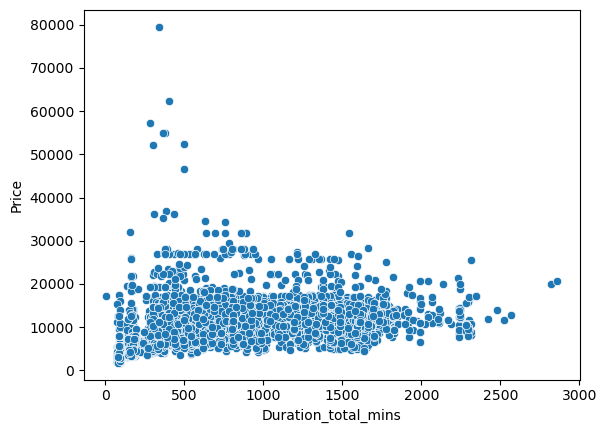

In [68]:
sns.scatterplot(x="Duration_total_mins", y="Price", data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

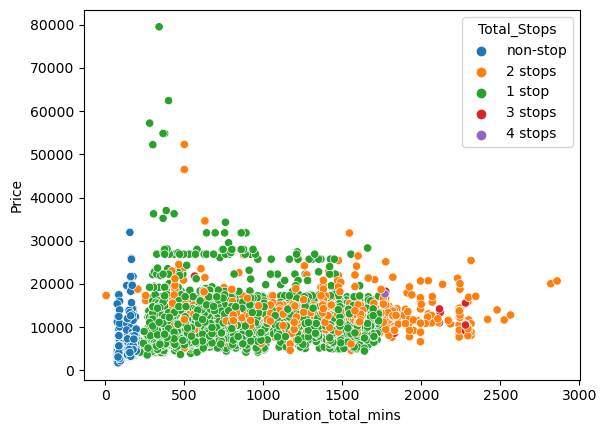

In [67]:
sns.scatterplot(x="Duration_total_mins", y="Price", hue="Total_Stops", data=data)

Based off the two plots as duration & number of stops increases the price will also increase

#### 3. On which route is Jet Airways most used?

These are the top 5 routes that Jet Airways operates

In [71]:
data["Airline"] == 'Jet Airways' 

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10683, dtype: bool

In [73]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending= False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [74]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending= False).head()

Route
CCU → BOM → BLR    930
DEL → BOM → COK    875
BLR → BOM → DEL    385
BLR → DEL          382
CCU → DEL → BLR    300
dtype: int64

#### 4. Airline Vs Price Analysis 

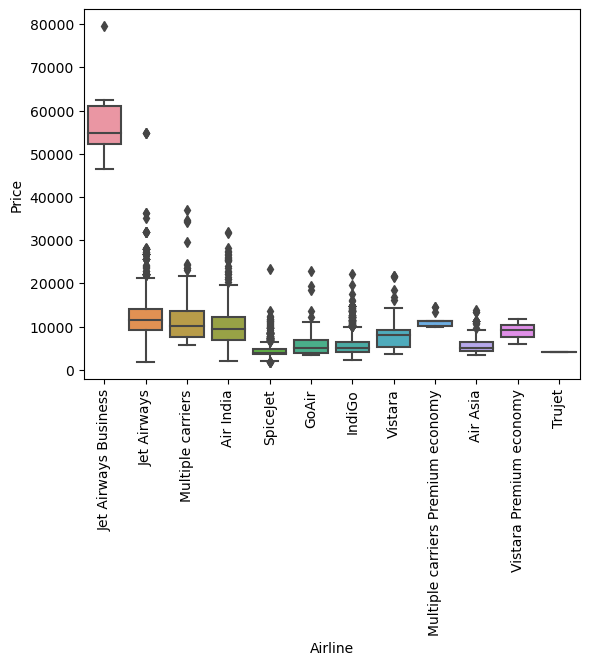

In [119]:
sns.boxplot(y = 'Price', x='Airline', data=data.sort_values('Price', ascending = False))
plt.xticks(rotation="vertical")
plt.show()

Jet Airways is the most expensive airline overall. Based on the graph it is clear that Jet Airways is significantly more expensive than other airlines
